In [2]:
!pip install watermark pycaret --quiet
%load_ext watermark
%watermark -a 'NavinKumarMNK' -v -p polars,plotly,catboost,lightgbm,xgboost,pycaret

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Author: NavinKumarMNK

Python implementation: CPython
Python version       : 3.10.10
IPython version      : 8.12.0

polars  : 0.17.5
plotly  : 5.14.1
catboost: 1.1.1
lightgbm: 3.3.2
xgboost : 1.7.5
pycaret : 3.0.2



In [3]:
import polars as pl
import pandas as pd
import os
import gc
import catboost as cb
import lightgbm as lgb
import xgboost as xgb
import plotly.express as px
from tqdm import tqdm
from sklearn.metrics import f1_score
from sklearn.model_selection import GroupKFold, KFold
import warnings
import optuna
from pycaret.classification import *
warnings.filterwarnings('ignore')

In [4]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/game-play-features/features/data_ques_4.parquet
/kaggle/input/game-play-features/features/data_ques_12.parquet
/kaggle/input/game-play-features/features/data_ques_14.parquet
/kaggle/input/game-play-features/features/data_ques_5.parquet
/kaggle/input/game-play-features/features/data_ques_13.parquet
/kaggle/input/game-play-features/features/data_ques_6.parquet
/kaggle/input/game-play-features/features/data_ques_15.parquet
/kaggle/input/game-play-features/features/data_ques_9.parquet
/kaggle/input/game-play-features/features/data_ques_11.parquet
/kaggle/input/game-play-features/features/data_ques_2.parquet
/kaggle/input/game-play-features/features/data_ques_1.parquet
/kaggle/input/game-play-features/features/data_ques_17.parquet
/kaggle/input/game-play-features/features/data_ques_8.parquet
/kaggle/input/game-play-features/features/data_ques_3.parquet
/kaggle/input/game-play-features/features/data_ques_7.parquet
/kaggle/input/game-play-features/features/data_ques_10.parquet
/

## **Training**

In [5]:
CATBOOST_CATS = ['year', 'month', 'day', 'hour', "is_fullscreen", "is_hq", "is_music"]

In [7]:
main_df

,session_id,session_number,navigate_click_event_name_counts,checkpoint_event_name_counts,map_hover_event_name_counts,notebook_click_event_name_counts,notification_click_event_name_counts,observation_click_event_name_counts,map_click_event_name_counts,object_hover_event_name_counts,...,screen_coor_y_max,screen_coor_y_min,hover_duration_max,hover_duration_min,year,month,day,hour,ques_1,target
0,20090312431273200,165,81,1,4,0,8,4,2,4,...,639.0,60.0,7899.0,17.0,20,10,3,12,1,1
1,20090312433251036,139,49,1,3,2,5,2,3,5,...,639.0,58.0,5567.0,17.0,20,10,3,12,0,1
2,20090312455206810,149,57,1,2,0,9,0,2,1,...,706.0,30.0,8401.0,51.0,20,10,3,12,1,1
3,20090313091715820,176,80,1,2,2,8,2,2,5,...,750.0,6.0,5794.0,216.0,20,10,3,13,0,1
4,20090313571836404,112,35,1,2,4,8,0,3,5,...,616.0,36.0,4383.0,16.0,20,10,3,13,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23557,22100215342220508,150,58,1,3,3,9,3,2,8,...,652.0,44.0,17093.0,17.0,22,11,2,15,1,1
23558,22100215460321130,149,50,1,3,7,9,1,2,5,...,682.0,48.0,5248.0,16.0,22,11,2,15,0,1
23559,22100217104993650,197,104,1,0,3,11,4,2,6,...,652.0,33.0,5664.0,17.0,22,11,2,17,1,1
23560,22100219442786200,167,81,1,1,6,8,1,3,5,...,618.0,22.0,7087.0,349.0,22,11,2,19,0,1


## **Question 1**

  0%|          | 0/1 [00:00<?, ?it/s]

--------------------------------------------------
Question 1
--------------------------------------------------
[17141, 6421]
2.669521881326896
[2.669521881326896, 1]
(23562, 149)


,Description,Value
0,Session id,1
1,Target,target
2,Target type,Binary
3,Original data shape,"(23562, 148)"
4,Transformed data shape,"(23562, 148)"
5,Transformed train set shape,"(23326, 148)"
6,Transformed test set shape,"(236, 148)"
7,Numeric features,140
8,Categorical features,7
9,Rows with missing values,7.9%


,F1
Fold,
0,0.6266
1,0.6157
2,0.6360
3,0.6200
4,0.6370
Mean,0.6270
Std,0.0085


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,F1
Fold,
0,0.5899
1,0.5665
2,0.5728
3,0.5799
4,0.5648
Mean,0.5748
Std,0.0092


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,F1,TT (Sec)
0,CatBoost Classifier,0.6270,0.2080
1,Light Gradient Boosting Machine,0.5748,0.1760


Processing:   0%|          | 0/14 [00:00<?, ?it/s]

,F1
Fold,
0,0.6247
1,0.6180
2,0.6383
3,0.6281
4,0.6426
Mean,0.6303
Std,0.0090


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

,F1
Fold,
0,0.5996
1,0.5921
2,0.5951
3,0.5835
4,0.5956
Mean,0.5932
Std,0.0054


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Warning] Unknown parameter: class_weights
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] Unknown parameter: class_weights
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] Unknown parameter: class_weights
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_fra

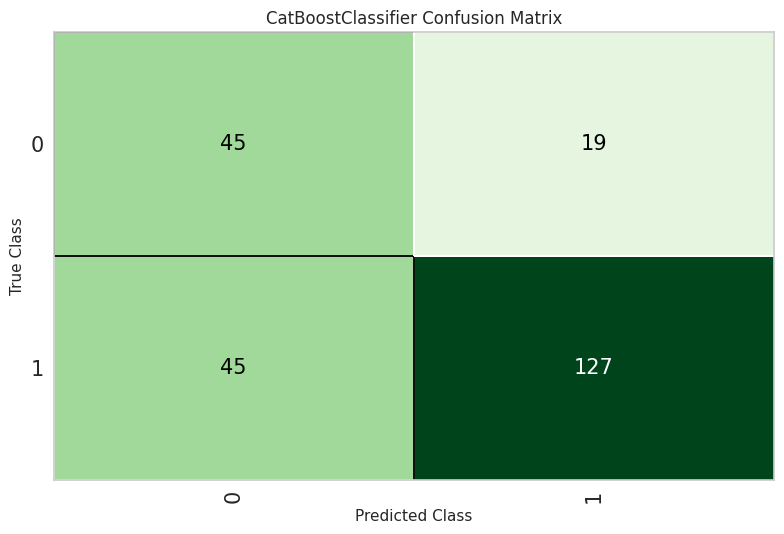

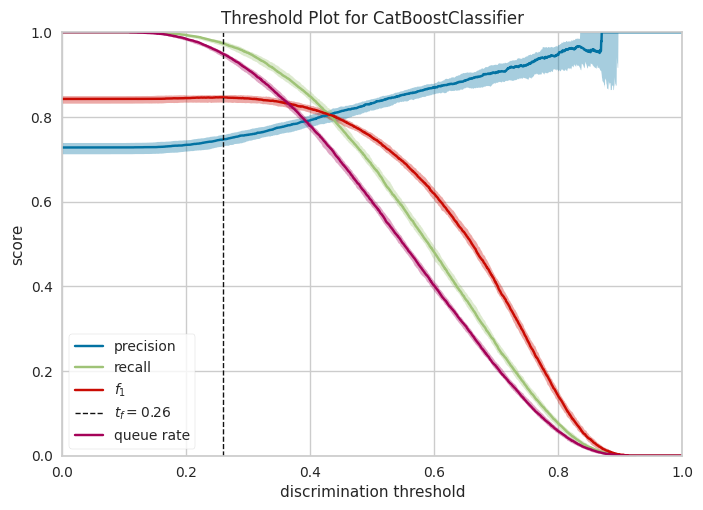

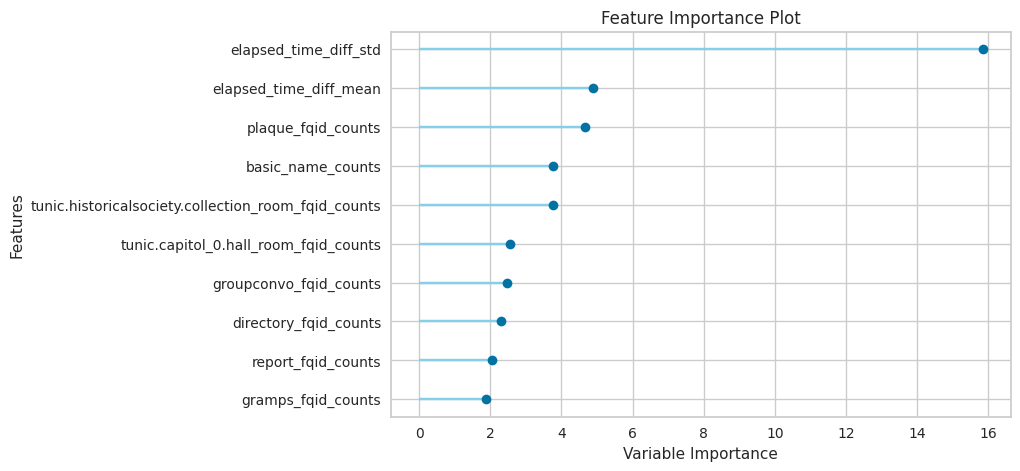

100%|██████████| 1/1 [08:39<00:00, 519.51s/it]


In [38]:
for q in tqdm(range(1, 2)):
    print("-"*50)
    print(f"Question {q}")
    print("-"*50)
    if q <= 3:
        grp = '0-4'
    elif q <= 13:
        grp = '5-12'
    elif q <= 22:
        grp = '13-22'
        
    main_df = pd.read_parquet(f"/kaggle/input/game-play-features/features/data_ques_{q}.parquet")
    main_df = main_df.drop("group", axis=1)
    
    a = main_df['target'].value_counts().to_list()
    print(a)
    weights = []
    
    xx = a[0] / a[1] 
    print(xx)
    weights.append(xx)
    weights.append(1)
    
    print(weights)
    print(main_df.shape)   
    exp = setup(main_df.iloc[:, 1:], target='target', session_id=1, fix_imbalance=True,
                fold_strategy=GroupKFold(n_splits=5), fold_groups=main_df['session_id'],
               preprocess=False, categorical_features=CATBOOST_CATS, use_gpu=True,
               train_size=0.99)
    
    from sklearn.metrics import make_scorer, f1_score
    
    remove_metric('f1')
    remove_metric('Accuracy')
    remove_metric('AUC')
    remove_metric('Recall')
    remove_metric('Precision')
    remove_metric('Kappa')
    remove_metric('MCC')
    
    
    
    add_metric('f1', 'F1', f1_score, average="macro", greater_is_better=True)
    
    catboost = create_model('catboost', 
                                    class_weights=weights, cat_features=CATBOOST_CATS)
    
    lightgbm = create_model('lightgbm',
                                    class_weights=weights)
    top_models = compare_models(include=[catboost, lightgbm], 
                                sort='F1', n_select=2, 
                                )

    tuned_top_models = [tune_model(model, optimize="F1", tuner_verbose=False) for model in top_models]
    
    # Finalize and save the best model
    best_model = finalize_model(tuned_top_models[0])
    save_model(best_model, f'best_model_ques_{q}')

    # Plot the model
    plot_model(best_model, plot='confusion_matrix')
    plot_model(best_model, plot='threshold')
    plot_model(best_model, plot='feature')

## **Question 2**

  0%|          | 0/1 [00:00<?, ?it/s]

--------------------------------------------------
Question 2
--------------------------------------------------
[23063, 499]
46.21843687374749
[46.21843687374749, 1]
(23562, 150)


,Description,Value
0,Session id,1
1,Target,target
2,Target type,Binary
3,Original data shape,"(23562, 149)"
4,Transformed data shape,"(23562, 149)"
5,Transformed train set shape,"(23326, 149)"
6,Transformed test set shape,"(236, 149)"
7,Numeric features,141
8,Categorical features,7
9,Rows with missing values,7.9%


,F1
Fold,
0,0.4868
1,0.5161
2,0.4992
3,0.4811
4,0.4909
Mean,0.4948
Std,0.0122


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,F1
Fold,
0,0.5073
1,0.4946
2,0.4940
3,0.4943
4,0.5039
Mean,0.4988
Std,0.0056


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,F1,TT (Sec)
1,Light Gradient Boosting Machine,0.4988,0.1840
0,CatBoost Classifier,0.4948,0.2060


Processing:   0%|          | 0/14 [00:00<?, ?it/s]

,F1
Fold,
0,0.5063
1,0.5209
2,0.5165
3,0.5436
4,0.5327
Mean,0.5240
Std,0.0129


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Warning] Unknown parameter: class_weights
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] Unknown parameter: class_weights
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] Unknown parameter: class_weights
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_fra

,F1
Fold,
0,0.5545
1,0.5602
2,0.5464
3,0.5537
4,0.5518
Mean,0.5533
Std,0.0044


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


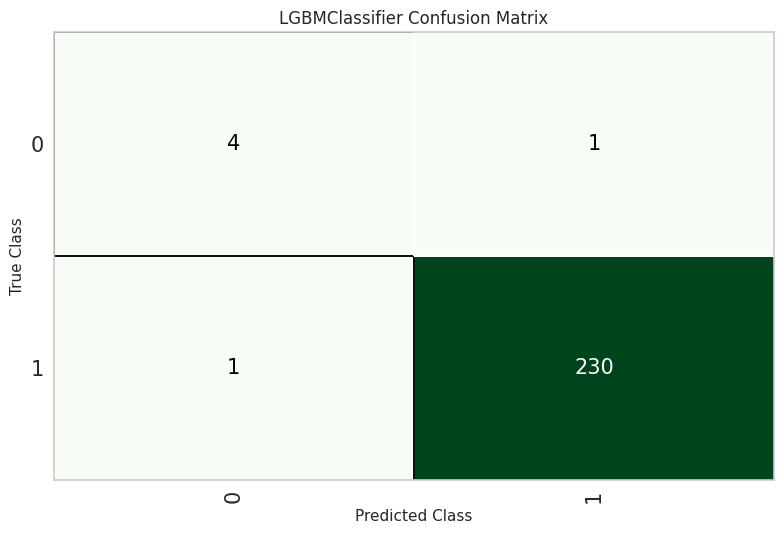

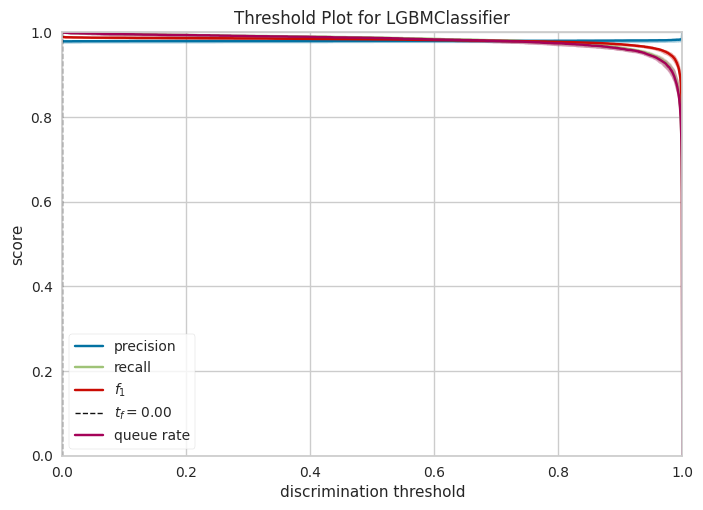

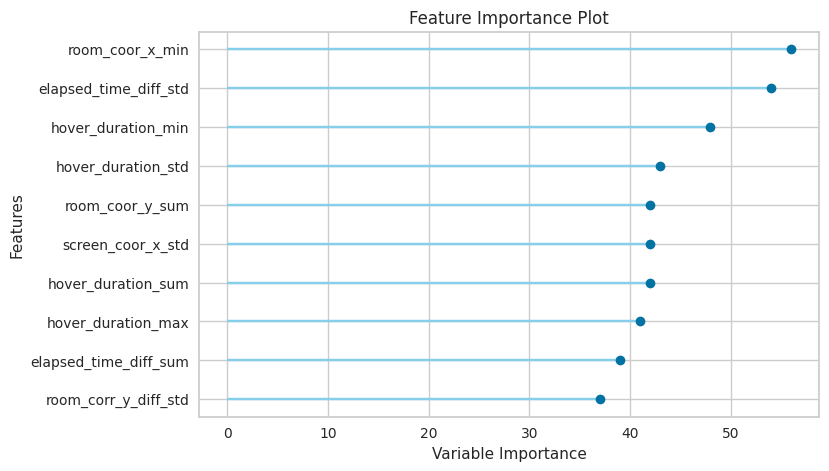

100%|██████████| 1/1 [10:50<00:00, 650.75s/it]


In [39]:
for q in tqdm(range(2, 3)):
    print("-"*50)
    print(f"Question {q}")
    print("-"*50)
    if q <= 3:
        grp = '0-4'
    elif q <= 13:
        grp = '5-12'
    elif q <= 22:
        grp = '13-22'
        
    main_df = pd.read_parquet(f"/kaggle/input/game-play-features/features/data_ques_{q}.parquet")
    main_df = main_df.drop("group", axis=1)
    
    a = main_df['target'].value_counts().to_list()
    print(a)
    weights = []
    
    xx = a[0] / a[1] 
    print(xx)
    weights.append(xx)
    weights.append(1)
    
    print(weights)
    print(main_df.shape)   
    exp = setup(main_df.iloc[:, 1:], target='target', session_id=1, fix_imbalance=True,
                fold_strategy=GroupKFold(n_splits=5), fold_groups=main_df['session_id'],
               preprocess=False, categorical_features=CATBOOST_CATS, use_gpu=True,
               train_size=0.99)
    
    from sklearn.metrics import make_scorer, f1_score
    
    remove_metric('f1')
    remove_metric('Accuracy')
    remove_metric('AUC')
    remove_metric('Recall')
    remove_metric('Precision')
    remove_metric('Kappa')
    remove_metric('MCC')
    
    
    
    add_metric('f1', 'F1', f1_score, average="macro", greater_is_better=True)
    
    catboost = create_model('catboost', 
                                    class_weights=weights, cat_features=CATBOOST_CATS)
    
    lightgbm = create_model('lightgbm',
                                    class_weights=weights)
    top_models = compare_models(include=[catboost, lightgbm], 
                                sort='F1', n_select=2, 
                                )

    tuned_top_models = [tune_model(model, optimize="F1", tuner_verbose=False) for model in top_models]
    
    # Finalize and save the best model
    best_model = finalize_model(tuned_top_models)
    save_model(best_model, f'best_model_ques_{q}')

    # Plot the model
    plot_model(best_model, plot='confusion_matrix')
    plot_model(best_model, plot='threshold')
    plot_model(best_model, plot='feature')

## **Question 3**

In [40]:
for q in tqdm(range(3, 4)):
    print("-"*50)
    print(f"Question {q}")
    print("-"*50)
    if q <= 3:
        grp = '0-4'
    elif q <= 13:
        grp = '5-12'
    elif q <= 22:
        grp = '13-22'
        
    main_df = pd.read_parquet(f"/kaggle/input/game-play-features/features/data_ques_{q}.parquet")
    main_df = main_df.drop("group", axis=1)
    
    a = main_df['target'].value_counts().to_list()
    print(a)
    weights = []
    
    xx = a[0] / a[1] 
    print(xx)
    weights.append(xx)
    weights.append(1)
    
    print(weights)
    print(main_df.shape)   
    exp = setup(main_df.iloc[:, 1:], target='target', session_id=q, fix_imbalance=True,
                fold_strategy=GroupKFold(n_splits=5), fold_groups=main_df['session_id'],
               preprocess=False, categorical_features=CATBOOST_CATS, use_gpu=True,
               train_size=0.99)
    
    from sklearn.metrics import make_scorer, f1_score
    
    remove_metric('f1')
    remove_metric('Accuracy')
    remove_metric('AUC')
    remove_metric('Recall')
    remove_metric('Precision')
    remove_metric('Kappa')
    remove_metric('MCC')
    
    
    
    add_metric('f1', 'F1', f1_score, average="macro", greater_is_better=True)
    
    catboost = create_model('catboost', 
                                    class_weights=weights, cat_features=CATBOOST_CATS)
    
    lightgbm = create_model('lightgbm',
                                    class_weights=weights)
    
    top_models = compare_models(include=[catboost, lightgbm], 
                                sort='F1', n_select=2, 
                                )
    
    
    tuned_top_models = [tune_model(model, optimize="F1", tuner_verbose=False) for model in top_models]
    


  0%|          | 0/1 [00:00<?, ?it/s]

--------------------------------------------------
Question 3
--------------------------------------------------
[22007, 1555]
14.1524115755627
[14.1524115755627, 1]
(23562, 151)


,Description,Value
0,Session id,3
1,Target,target
2,Target type,Binary
3,Original data shape,"(23562, 150)"
4,Transformed data shape,"(23562, 150)"
5,Transformed train set shape,"(23326, 150)"
6,Transformed test set shape,"(236, 150)"
7,Numeric features,142
8,Categorical features,7
9,Rows with missing values,7.9%


,F1
Fold,
0,0.5227
1,0.5324
2,0.5045
3,0.5254
4,0.5114
Mean,0.5193
Std,0.0100


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,F1
Fold,
0,0.4995
1,0.4873
2,0.4880
3,0.4920
4,0.5042
Mean,0.4942
Std,0.0066


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,F1,TT (Sec)
0,CatBoost Classifier,0.5193,0.2120
1,Light Gradient Boosting Machine,0.4942,0.2020


Processing:   0%|          | 0/14 [00:00<?, ?it/s]

,F1
Fold,
0,0.5289
1,0.5553
2,0.5598
3,0.5484
4,0.5406
Mean,0.5466
Std,0.0110


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

,F1
Fold,
0,0.4997
1,0.4952
2,0.5003
3,0.5078
4,0.5253
Mean,0.5056
Std,0.0106


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Warning] Unknown parameter: class_weights
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Unknown parameter: class_weights
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Unknown parameter: class_weights
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fra

  0%|          | 0/1 [11:10<?, ?it/s]


ValueError: Estimator [<catboost.core.CatBoostClassifier object at 0x7910e69a04f0>, LGBMClassifier(bagging_fraction=1.0, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, class_weights=[14.1524115755627, 1],
               colsample_bytree=1.0, device='gpu', feature_fraction=0.4,
               importance_type='split', learning_rate=0.3, max_depth=-1,
               min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
               n_estimators=160, n_jobs=-1, num_leaves=20, objective=None,
               random_state=3, reg_alpha=0.001, reg_lambda=1e-06, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)] does not have the required fit() method.

In [42]:
tuned_top_models

 LGBMClassifier(bagging_fraction=1.0, bagging_freq=3, boosting_type='gbdt',
                class_weight=None, class_weights=[14.1524115755627, 1],
                colsample_bytree=1.0, device='gpu', feature_fraction=0.4,
                importance_type='split', learning_rate=0.3, max_depth=-1,
                min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
                n_estimators=160, n_jobs=-1, num_leaves=20, objective=None,
                random_state=3, reg_alpha=0.001, reg_lambda=1e-06, silent='warn',
                subsample=1.0, subsample_for_bin=200000, subsample_freq=0)]

Transformation Pipeline and Model Successfully Saved


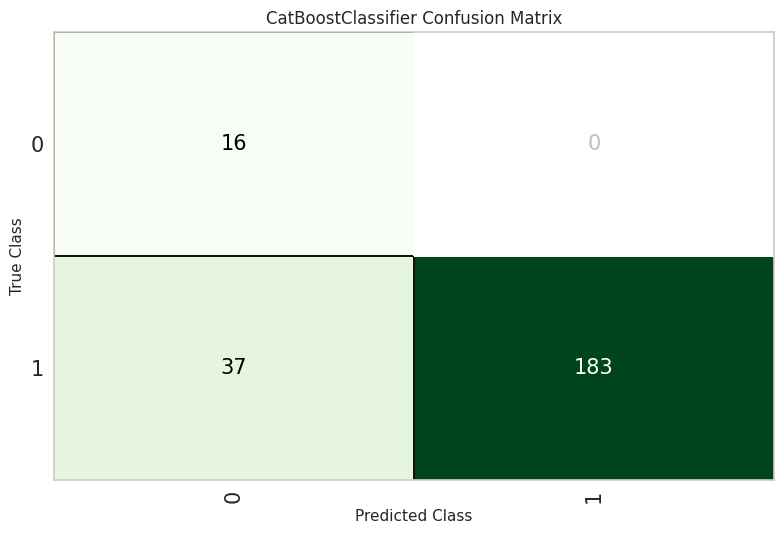

KeyboardInterrupt: 

<Figure size 800x550 with 0 Axes>

In [44]:
# Finalize and save the best model
best_model = finalize_model(tuned_top_models[0])
save_model(best_model, f'best_model_ques_{q}')

# Plot the model
plot_model(best_model, plot='confusion_matrix')
plot_model(best_model, plot='threshold')
plot_model(best_model, plot='feature')

## **Question 4**

In [46]:
for q in tqdm(range(4, 5)):
    print("-"*50)
    print(f"Question {q}")
    print("-"*50)
    if q <= 3:
        grp = '0-4'
    elif q <= 13:
        grp = '5-12'
    elif q <= 22:
        grp = '13-22'
        
    main_df = pd.read_parquet(f"/kaggle/input/game-play-features/features/data_ques_{q}.parquet")
    main_df = main_df.drop("group", axis=1)
    
    a = main_df['target'].value_counts().to_list()
    print(a)
    weights = []
    
    xx = a[0] / a[1] 
    print(xx)
    weights.append(xx)
    weights.append(1)
    
    print(weights)
    print(main_df.shape)   
    exp = setup(main_df.iloc[:, 1:], target='target', session_id=q, fix_imbalance=True,
                fold_strategy=GroupKFold(n_splits=5), fold_groups=main_df['session_id'],
               preprocess=False, categorical_features=CATBOOST_CATS, use_gpu=True,
               train_size=0.99)
    
    from sklearn.metrics import make_scorer, f1_score
    
    remove_metric('f1')
    remove_metric('Accuracy')
    remove_metric('AUC')
    remove_metric('Recall')
    remove_metric('Precision')
    remove_metric('Kappa')
    remove_metric('MCC')
    
    
    
    add_metric('f1', 'F1', f1_score, average="macro", greater_is_better=True)
    
    catboost = create_model('catboost', 
                                    class_weights=weights, cat_features=CATBOOST_CATS,
                                    loss_function="Logloss"
                                    )
    
    lightgbm = create_model('lightgbm',
                                    class_weights=weights)
   
    top_models = [catboost, lightgbm]
    tuned_top_models = [tune_model(model, optimize="F1", tuner_verbose=False) for model in top_models]


  0%|          | 0/1 [00:00<?, ?it/s]

--------------------------------------------------
Question 4
--------------------------------------------------
[18808, 4754]
3.9562473706352543
[3.9562473706352543, 1]
(23562, 214)


,Description,Value
0,Session id,4
1,Target,target
2,Target type,Binary
3,Original data shape,"(23562, 213)"
4,Transformed data shape,"(23562, 213)"
5,Transformed train set shape,"(23326, 213)"
6,Transformed test set shape,"(236, 213)"
7,Numeric features,205
8,Categorical features,7
9,Rows with missing values,7.9%


,F1
Fold,
0,0.6510
1,0.6269
2,0.6304
3,0.6453
4,0.6511
Mean,0.6410
Std,0.0103


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,F1
Fold,
0,0.6165
1,0.6174
2,0.6037
3,0.5907
4,0.5979
Mean,0.6052
Std,0.0104


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,F1
Fold,
0,0.6589
1,0.6329
2,0.6354
3,0.6450
4,0.6541
Mean,0.6453
Std,0.0101


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

,F1
Fold,
0,0.6230
1,0.6126
2,0.6079
3,0.6104
4,0.6221
Mean,0.6152
Std,0.0062


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Warning] Unknown parameter: class_weights
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Unknown parameter: class_weights
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Unknown parameter: class_weights
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fra

100%|██████████| 1/1 [11:34<00:00, 694.95s/it]


Transformation Pipeline and Model Successfully Saved


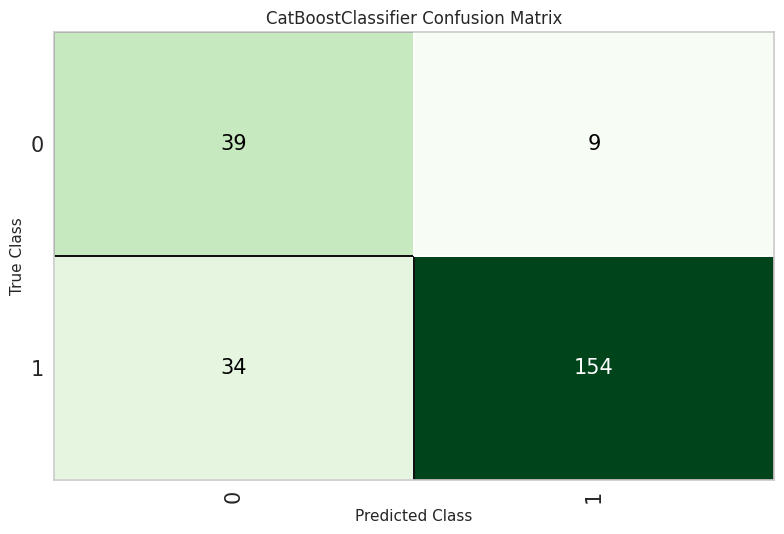

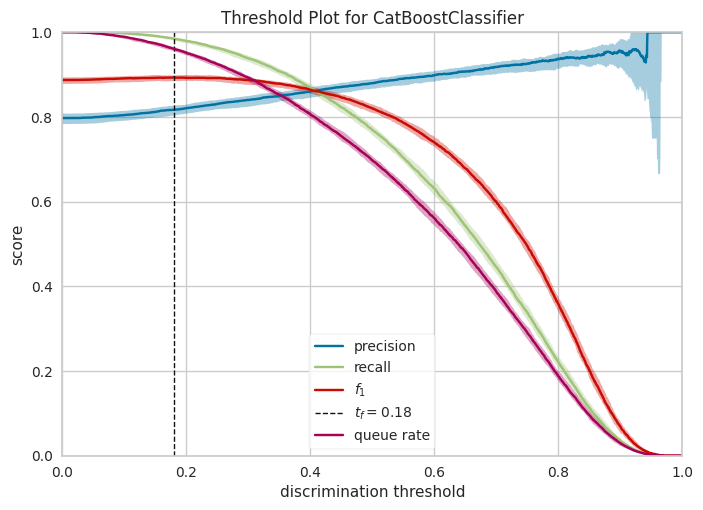

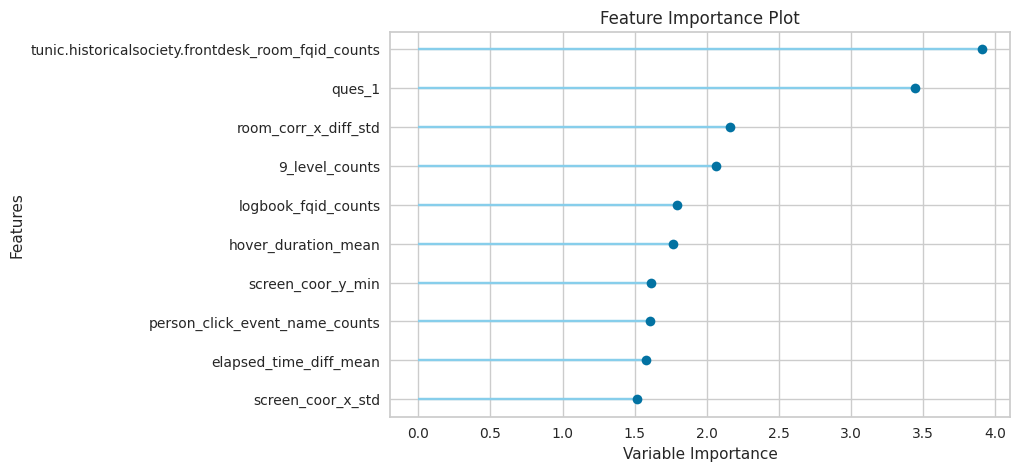

In [49]:
# Finalize and save the best model
best_model = finalize_model(tuned_top_models[0])
save_model(best_model, f'best_model_ques_{q}')

# Plot the model
plot_model(best_model, plot='confusion_matrix')
plot_model(best_model, plot='threshold')
plot_model(best_model, plot='feature')

## **Questions 5**

In [ ]:
for q in tqdm(range(5, 6)):
    print("-"*50)
    print(f"Question {q}")
    print("-"*50)
    if q <= 3:
        grp = '0-4'
    elif q <= 13:
        grp = '5-12'
    elif q <= 22:
        grp = '13-22'
        
    main_df = pd.read_parquet(f"/kaggle/input/game-play-features/features/data_ques_{q}.parquet")
    main_df = main_df.drop("group", axis=1)
    
    a = main_df['target'].value_counts().to_list()
    print(a)
    weights = []
    
    xx = a[0] / a[1] 
    print(xx)
    weights.append(xx)
    weights.append(1)
    
    print(weights)
    print(main_df.shape)   
    exp = setup(main_df.iloc[:, 1:], target='target', session_id=q, fix_imbalance=True,
                fold_strategy=GroupKFold(n_splits=5), fold_groups=main_df['session_id'],
               preprocess=False, categorical_features=CATBOOST_CATS, use_gpu=True,
               train_size=0.99)
    
    from sklearn.metrics import make_scorer, f1_score
    
    remove_metric('f1')
    remove_metric('Accuracy')
    remove_metric('AUC')
    remove_metric('Recall')
    remove_metric('Precision')
    remove_metric('Kappa')
    remove_metric('MCC')
    
    
    
    add_metric('f1', 'F1', f1_score, average="macro", greater_is_better=True)
    
    catboost = create_model('catboost', 
                                    class_weights=weights, cat_features=CATBOOST_CATS,
                                    loss_function="Logloss"
                                    )
    
    lightgbm = create_model('lightgbm',
                                    class_weights=weights)
   
    top_models = [catboost, lightgbm]
    tuned_top_models = [tune_model(model, optimize="F1", tuner_verbose=False) for model in top_models]


In [ ]:
# Finalize and save the best model
best_model = finalize_model(tuned_top_models[0])
save_model(best_model, f'best_model_ques_{q}')

# Plot the model
plot_model(best_model, plot='confusion_matrix')
plot_model(best_model, plot='threshold')
plot_model(best_model, plot='feature')

## **Question 6**

In [ ]:
for q in tqdm(range(5, 6)):
    print("-"*50)
    print(f"Question {q}")
    print("-"*50)
    if q <= 3:
        grp = '0-4'
    elif q <= 13:
        grp = '5-12'
    elif q <= 22:
        grp = '13-22'
        
    main_df = pd.read_parquet(f"/kaggle/input/game-play-features/features/data_ques_{q}.parquet")
    main_df = main_df.drop("group", axis=1)
    
    a = main_df['target'].value_counts().to_list()
    print(a)
    weights = []
    
    xx = a[0] / a[1] 
    print(xx)
    weights.append(xx)
    weights.append(1)
    
    print(weights)
    print(main_df.shape)   
    exp = setup(main_df.iloc[:, 1:], target='target', session_id=q, fix_imbalance=True,
                fold_strategy=GroupKFold(n_splits=5), fold_groups=main_df['session_id'],
               preprocess=False, categorical_features=CATBOOST_CATS, use_gpu=True,
               train_size=0.99)
    
    from sklearn.metrics import make_scorer, f1_score
    
    remove_metric('f1')
    remove_metric('Accuracy')
    remove_metric('AUC')
    remove_metric('Recall')
    remove_metric('Precision')
    remove_metric('Kappa')
    remove_metric('MCC')
    
    
    
    add_metric('f1', 'F1', f1_score, average="macro", greater_is_better=True)
    
    catboost = create_model('catboost', 
                                    class_weights=weights, cat_features=CATBOOST_CATS,
                                    loss_function="Logloss"
                                    )
    
    lightgbm = create_model('lightgbm',
                                    class_weights=weights)
   
    top_models = [catboost, lightgbm]
    tuned_top_models = [tune_model(model, optimize="F1", tuner_verbose=False) for model in top_models]


In [ ]:
# Finalize and save the best model
best_model = finalize_model(tuned_top_models[0])
save_model(best_model, f'best_model_ques_{q}')

# Plot the model
plot_model(best_model, plot='confusion_matrix')
plot_model(best_model, plot='threshold')
plot_model(best_model, plot='feature')

## **Question 7**